In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM Classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy on Iris Dataset: {accuracy:.2f}")


SVM Accuracy on Iris Dataset: 1.00


In [2]:
from sklearn.datasets import load_wine

# Load Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear kernel
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
linear_acc = accuracy_score(y_test, linear_svm.predict(X_test))

# RBF kernel
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)
rbf_acc = accuracy_score(y_test, rbf_svm.predict(X_test))

print(f"Linear SVM Accuracy: {linear_acc:.2f}")
print(f"RBF SVM Accuracy: {rbf_acc:.2f}")


Linear SVM Accuracy: 1.00
RBF SVM Accuracy: 0.81


In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

# MSE
mse = mean_squared_error(y_test, y_pred)
print(f"SVR Mean Squared Error: {mse:.2f}")


SVR Mean Squared Error: 0.36


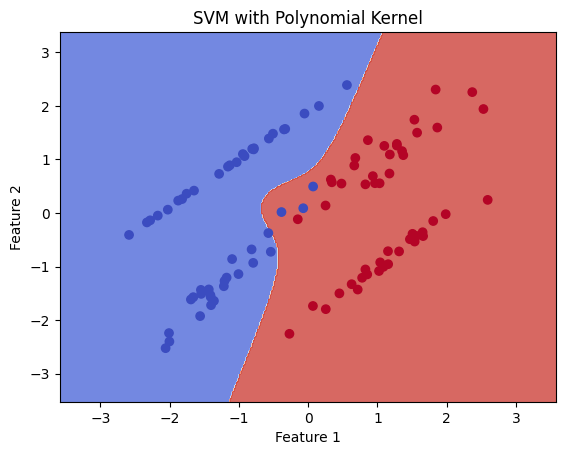

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Create a toy 2D classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, random_state=42)

# Train SVM with polynomial kernel
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X, y)

# Plotting decision boundary
def plot_decision_boundary(model, X, y):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.title("SVM with Polynomial Kernel")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(svm_poly, X, y)


In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer

# Load Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"GaussianNB Accuracy on Breast Cancer Dataset: {acc:.2f}")


GaussianNB Accuracy on Breast Cancer Dataset: 0.97


In [6]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Load dataset
categories = ['sci.space', 'rec.sport.baseball', 'comp.graphics', 'talk.politics.misc']
train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

# Create pipeline
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Train and evaluate
model.fit(train.data, train.target)
predicted = model.predict(test.data)

# Accuracy
acc = accuracy_score(test.target, predicted)
print(f"MultinomialNB Accuracy on 20 Newsgroups: {acc:.2f}")


MultinomialNB Accuracy on 20 Newsgroups: 0.95


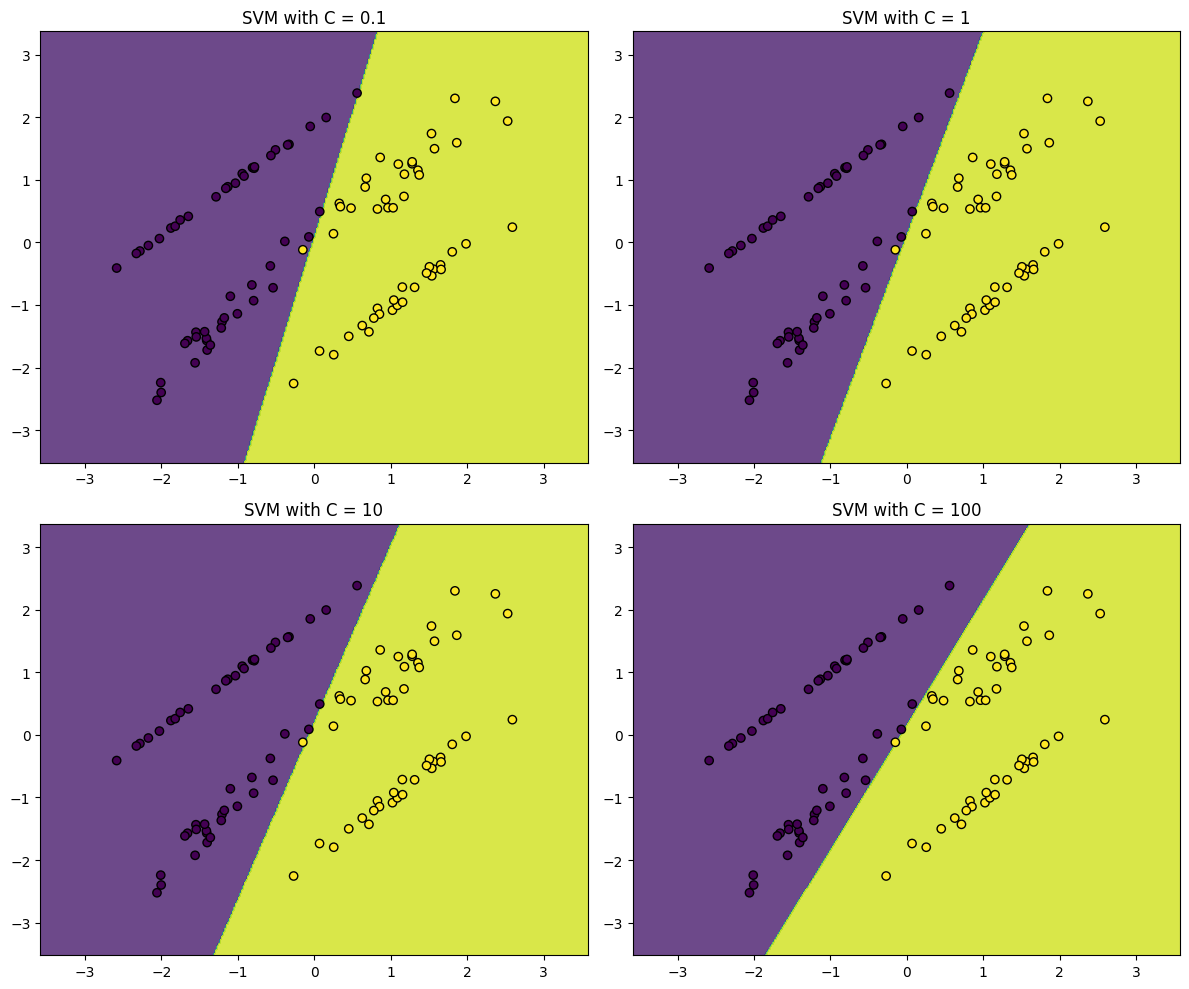

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Generate toy dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, random_state=42)

# C values to try
C_values = [0.1, 1, 10, 100]

plt.figure(figsize=(12, 10))
for i, C in enumerate(C_values):
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)

    # Create mesh
    ax = plt.subplot(2, 2, i + 1)
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    ax.set_title(f"SVM with C = {C}")
plt.tight_layout()
plt.show()


In [8]:
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Simulate binary feature dataset
X = np.random.randint(0, 2, size=(1000, 10))
y = np.random.randint(0, 2, size=1000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)

print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred))


BernoulliNB Accuracy: 0.445


In [9]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Without scaling
clf_unscaled = SVC()
clf_unscaled.fit(X_train, y_train)
acc_unscaled = accuracy_score(y_test, clf_unscaled.predict(X_test))

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf_scaled = SVC()
clf_scaled.fit(X_train_scaled, y_train)
acc_scaled = accuracy_score(y_test, clf_scaled.predict(X_test_scaled))

print(f"Accuracy without scaling: {acc_unscaled:.2f}")
print(f"Accuracy with scaling: {acc_scaled:.2f}")


Accuracy without scaling: 1.00
Accuracy with scaling: 1.00


In [10]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load text data
categories = ['sci.space', 'rec.sport.hockey']
data = fetch_20newsgroups(subset='train', categories=categories)
vectorizer = CountVectorizer(binary=False)
X = vectorizer.fit_transform(data.data)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Without Laplace smoothing (alpha=0.0 will throw error, so we use very small)
model_no_smooth = MultinomialNB(alpha=1e-10)
model_no_smooth.fit(X_train, y_train)
acc_no_smooth = accuracy_score(y_test, model_no_smooth.predict(X_test))

# With Laplace smoothing (alpha=1.0)
model_smooth = MultinomialNB(alpha=1.0)
model_smooth.fit(X_train, y_train)
acc_smooth = accuracy_score(y_test, model_smooth.predict(X_test))

print(f"Accuracy without Laplace smoothing: {acc_no_smooth:.2f}")
print(f"Accuracy with Laplace smoothing: {acc_smooth:.2f}")


Accuracy without Laplace smoothing: 0.98
Accuracy with Laplace smoothing: 0.99


In [11]:
from sklearn.datasets import load_wine
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Load dataset
wine = load_wine()
X, y = wine.data, wine.target

# Define model and parameters
svm = SVC()
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 1],
    'kernel': ['linear', 'rbf']
}

# Grid search
grid = GridSearchCV(svm, param_grid, cv=5)
grid.fit(X, y)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.961111111111111


In [12]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create imbalanced dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], flip_y=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Without class weight
model_normal = SVC()
model_normal.fit(X_train, y_train)
print("Without class weight:", accuracy_score(y_test, model_normal.predict(X_test)))

# With class weight
model_weighted = SVC(class_weight='balanced')
model_weighted.fit(X_train, y_train)
print("With class weight:", accuracy_score(y_test, model_weighted.predict(X_test)))


Without class weight: 0.945
With class weight: 0.915


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example email dataset
emails = [
    "Win a free iPhone now", "Free lottery tickets inside", "Hey, how are you doing?",
    "Meeting at 10am", "Exclusive deal just for you", "Let's catch up soon"
]
labels = [1, 1, 0, 0, 1, 0]  # 1: Spam, 0: Not Spam

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails)
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)
print("Spam Detection Accuracy:", accuracy_score(y_test, model.predict(X_test)))


Spam Detection Accuracy: 0.0


In [14]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# SVM
svm = SVC()
svm.fit(X_train, y_train)
acc_svm = accuracy_score(y_test, svm.predict(X_test))

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
acc_nb = accuracy_score(y_test, nb.predict(X_test))

print("SVM Accuracy:", acc_svm)
print("Naive Bayes Accuracy:", acc_nb)


SVM Accuracy: 0.9333333333333333
Naive Bayes Accuracy: 0.9111111111111111


In [17]:
from sklearn.datasets import load_wine
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target)

ovr = OneVsRestClassifier(SVC())
ovo = OneVsOneClassifier(SVC())

ovr.fit(X_train, y_train)
ovo.fit(X_train, y_train)

print("OvR Accuracy:", ovr.score(X_test, y_test))
print("OvO Accuracy:", ovo.score(X_test, y_test))



OvR Accuracy: 0.5555555555555556
OvO Accuracy: 0.6222222222222222


In [18]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

for kernel in ['linear', 'poly', 'rbf']:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    print(f"{kernel} kernel Accuracy: {model.score(X_test, y_test)}")


linear kernel Accuracy: 0.9440559440559441
poly kernel Accuracy: 0.8811188811188811
rbf kernel Accuracy: 0.8951048951048951


In [19]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5)
model = SVC()
scores = cross_val_score(model, cancer.data, cancer.target, cv=skf)

print("Cross-validation scores:", scores)
print("Average Accuracy:", scores.mean())


Cross-validation scores: [0.85087719 0.89473684 0.92982456 0.94736842 0.9380531 ]
Average Accuracy: 0.9121720229777983


In [20]:
model1 = GaussianNB(priors=[0.5, 0.5])
model1.fit(X_train, y_train)

model2 = GaussianNB(priors=[0.3, 0.7])
model2.fit(X_train, y_train)

print("Accuracy with prior [0.5, 0.5]:", model1.score(X_test, y_test))
print("Accuracy with prior [0.3, 0.7]:", model2.score(X_test, y_test))


Accuracy with prior [0.5, 0.5]: 0.9370629370629371
Accuracy with prior [0.3, 0.7]: 0.9370629370629371


In [21]:
from sklearn.feature_selection import RFE

svm = SVC(kernel="linear")
rfe = RFE(estimator=svm, n_features_to_select=5)
X_rfe = rfe.fit_transform(cancer.data, cancer.target)

X_train, X_test, y_train, y_test = train_test_split(X_rfe, cancer.target)
svm.fit(X_train, y_train)
print("SVM with RFE Accuracy:", svm.score(X_test, y_test))


SVM with RFE Accuracy: 0.8461538461538461


In [22]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred, average='macro'))


Precision: 0.9649122807017544
Recall: 0.9487179487179488
F1-Score: 0.9537037037037036


In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

model = GaussianNB()
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_test)

print("Log Loss:", log_loss(y_test, y_proba))


Log Loss: 0.2231758529782734


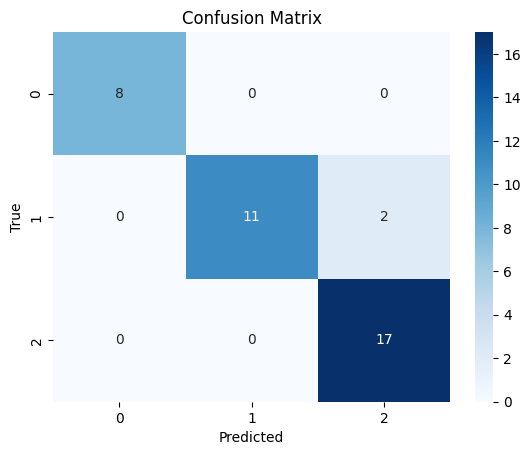

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [25]:
from sklearn.svm import SVR
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_absolute_error

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))


Mean Absolute Error (MAE): 59.63827833676948


In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
model = GaussianNB()
model.fit(X_train, y_train)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = model.predict_proba(X_test)

print("ROC AUC Score:", roc_auc_score(y_test_bin, y_score, multi_class='ovr'))


ROC AUC Score: 1.0


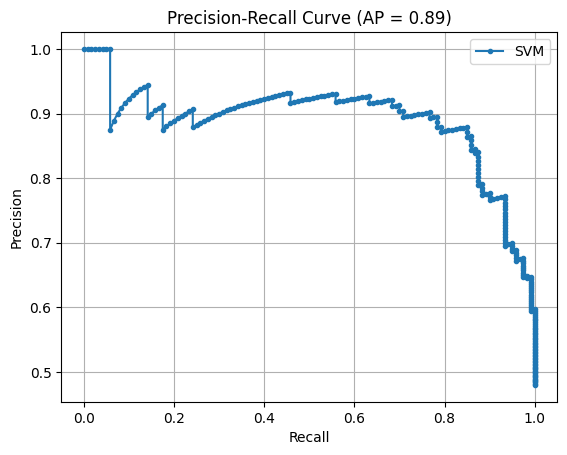

In [27]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_classes=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = SVC(probability=True)
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_score)
avg_precision = average_precision_score(y_test, y_score)

plt.plot(recall, precision, marker='.', label='SVM')
plt.title(f'Precision-Recall Curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()


Q1.A Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression. It finds the optimal hyperplane that separates different classes in the feature space by maximizing the margin between the closest data points (support vectors) of each class.


Q2.
| Feature            | Hard Margin                    | Soft Margin                    |
| ------------------ | ------------------------------ | ------------------------------ |
| Assumption         | Perfect separation is possible | Allows some misclassifications |
| Tolerance to Noise | Low                            | High                           |
| Overfitting Risk   | High                           | Lower                          |
| Use Case           | Clean, linearly separable data | Noisy or overlapping data      |
Q3
 Mathematical Intuition Behind SVM
SVM tries to solve the optimization problem:

Minimize
1
2
∥
𝑤
∥
2
subject to
𝑦
𝑖
(
𝑤
⋅
𝑥
𝑖
+
𝑏
)
≥
1
Minimize
2
1
​
 ∥w∥
2
 subject toy
i
​
 (w⋅x
i
​
 +b)≥1
Where:

𝑤
w: weight vector

𝑏
b: bias

𝑦
𝑖
y
i
​
 : class label (+1 or -1)

𝑥
𝑖
x
i
​
 : feature vector

It finds the maximum-margin hyperplane that separates the classes.



Q4.Role of Lagrange Multipliers in SVM
Lagrange Multipliers are used to convert the constrained optimization problem into a dual problem. They help identify support vectors and make computation easier in high-dimensional space using the kernel trick.

Q5. Support Vectors in SVM
Support vectors are the data points closest to the separating hyperplane. They are critical because the position of the hyperplane is entirely determined by these points.

Q6.Support Vector Classifier (SVC)
SVC is the classification implementation of SVM in scikit-learn. It supports linear and non-linear kernels like RBF, Polynomial, etc.
Q7.Support Vector Regressor (SVR)
SVR is the regression version of SVM. It tries to fit the data within a tube (epsilon margin) while minimizing the error outside the tube.

Q8  Kernel Trick in SVM
The kernel trick allows SVM to operate in a higher-dimensional space without explicitly transforming the data. It uses a kernel function to compute the dot product in this space, enabling non-linear classification.

Q9.| Kernel     | Equation                                | Use Case                                |
| ---------- | --------------------------------------- | --------------------------------------- |
| Linear     | $K(x, x') = x \cdot x'$                 | Linearly separable data                 |
| Polynomial | $K(x, x') = (x \cdot x' + c)^d$         | Polynomial decision boundary            |
| RBF        | $K(x, x') = \exp(-\gamma \|x - x'\|^2)$ | Non-linear and complex decision regions |
Q10. Effect of the C Parameter in SVM
C controls the trade-off between maximizing the margin and minimizing classification error.

Small C: Wider margin, more tolerance to misclassification.

Large C: Narrow margin, less tolerance to misclassification.

Q11. Role of Gamma in RBF Kernel SVM
Gamma controls the influence of a single training example.

Low gamma: Points far away have more influence → smoother decision boundary.

High gamma: Points closer have more influence → complex decision boundary (can overfit).
Q12. Naïve Bayes Classifier and Why It's "Naïve"
It’s a probabilistic classifier based on Bayes' Theorem with a naïve assumption: all features are conditionally independent given the class label.

Q13.P(C∣X)=
P(X)
P(X∣C)⋅P(C)
​

Where:

P
(
C
∣
X
)
P(C∣X): Posterior

P
(
X
∣
C
)
P(X∣C): Likelihood

P
(
C
)
P(C): Prior

P
(
X
)
P(X): Evidence (constant across classes

Q14| Variant       | Data Type           | Distribution Assumption      |
| ------------- | ------------------- | ---------------------------- |
| GaussianNB    | Continuous features | Normal distribution          |
| MultinomialNB | Discrete counts     | Multinomial distribution     |
| BernoulliNB   | Binary features     | Bernoulli (0/1) distribution |
Q15. When to Use Gaussian Naïve Bayes
Use GaussianNB when features are continuous and approximately normally distributed, like sensor data or age/income.
Q16.Key Assumptions of Naïve Bayes
Feature independence: All features are independent given the class.

Equal importance of features.

No correlation between features (which is often violated in practice).
Q17. Advantages & Disadvantages of Naïve Bayes
✅ Advantages:

Simple, fast, and efficient

Works well with high-dimensional data

Good for baseline models

❌ Disadvantages:

Strong independence assumption

Performs poorly with correlated features
Q18. Why Naïve Bayes is Great for Text Classification
Text data (e.g., spam detection, sentiment analysis) is usually high-dimensional and sparse.

MultinomialNB performs well when using word counts or TF-IDF.

Fast training, even with large vocabularies.
Q19.Why Naïve Bayes is Great for Text Classification
Text data (e.g., spam detection, sentiment analysis) is usually high-dimensional and sparse.

MultinomialNB performs well when using word counts or TF-IDF.

Fast training, even with large vocabularies.
Q20.
| Feature              | SVM                    | Naïve Bayes            |
| -------------------- | ---------------------- | ---------------------- |
| Type                 | Discriminative         | Generative             |
| Training Time        | Slower                 | Faster                 |
| Works on Sparse Data | Moderate               | Excellent              |
| Performance          | Higher with clean data | High baseline for text |
| Interpretability     | Low                    | Moderate               |


